In [1]:
#https://www.kaggle.com/code/prasadmeesala/breast-cancer-classification-1-0
import numpy as np

# # Import PySwarms
# import pyswarms as ps
# PySwarm Upgrade: scikit-opt
import sko

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#/Users/4lali/Downloads/GSE58606_data.csv
data=pd.read_csv("CUMIDA-Breast-Cancer/Breast_GSE45827.csv")

In [3]:
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [4]:
data=data.dropna(axis=0, how='any')
data.shape

(151, 54677)

In [5]:
# check missing values :
data.isnull().values.any()

False

In [6]:
data.iloc[:, :10].describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095
std,45.431226,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550
min,84.000000,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065
25%,121.500000,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260
50%,159.000000,10.416819,7.531673,6.235074,7.333426,3.187703,7.417113,5.274663,4.662957
75%,200.500000,10.735117,8.053832,6.612291,7.513084,3.280416,7.760806,5.456686,4.941337
max,238.000000,11.675109,9.627008,8.364749,8.374055,3.611630,8.569296,6.360765,5.893006


In [7]:
data.groupby("type").count()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
type,,,,,,,,,,,,,,,,,,,,,
HER,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
basal,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
cell_line,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
luminal_A,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
luminal_B,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
normal,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64 




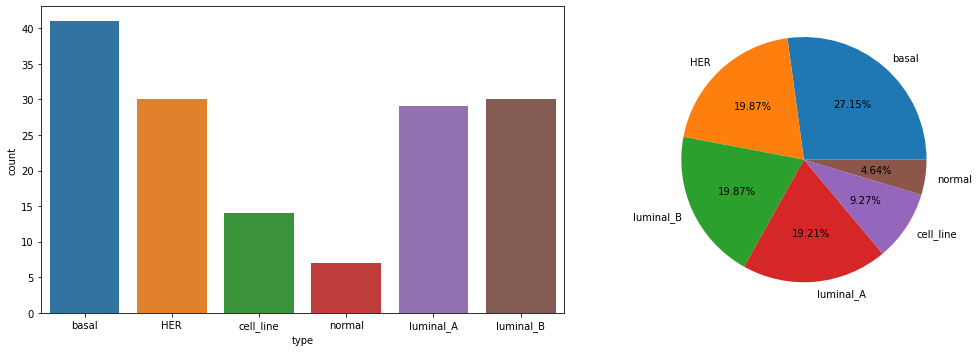

In [8]:
target  = "type"

val_counts = data[target].value_counts()
print(val_counts, "\n\n")

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = data[target])

plt.subplot(1, 2, 2)
plt.pie(val_counts, labels = val_counts.keys(), autopct = "%.2f%%")

plt.tight_layout()
plt.show()

In [9]:
#Encoding categorical feature(s) (Ordinal Encoding)

class_map = {"normal": 0, "cell_line": 1, "luminal_A": 2, "luminal_B": 3, "HER": 4, "basal": 5}
class_map_reverse = {m : n for m, n in zip(class_map.values(), class_map.keys())}

encoder = category_encoders.OrdinalEncoder(cols = [target], mapping = [{"col": target, "mapping": class_map}])

data['type'] = encoder.fit_transform(data[target])

In [10]:
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,5,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,5,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,5,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,5,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,5,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [11]:
# Separate features (gene expression values) and target variable (sample type)
X = data.drop(['samples', 'type'], axis=1)
y = data['type']


In [12]:
print(X.shape, y.shape)

(151, 54675) (151,)


In [13]:
# Normalize gene expression data using Z-score normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [14]:
# Perform t-test for feature selection
t_scores, p_values = ttest_ind(X_normalized, y, axis=0)

# Select top-m genes with the largest T-statistic
m = 1000  # Number of top genes to select
selected_genes_indices = (-t_scores).argsort()[:m]
selected_features = X.columns[selected_genes_indices]

# Filter dataset to include only selected features
X_selected = X[selected_features]

In [15]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [16]:
# Train K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.5806451612903226
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         5
           2       0.20      1.00      0.33         3
           3       1.00      0.29      0.44         7
           4       0.67      0.40      0.50         5
           5       1.00      0.60      0.75        10

    accuracy                           0.58        31
   macro avg       0.64      0.55      0.50        31
weighted avg       0.84      0.58      0.62        31



/home/thetruehooha/.venvs/vimJupy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thetruehooha/.venvs/vimJupy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thetruehooha/.venvs/vimJupy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

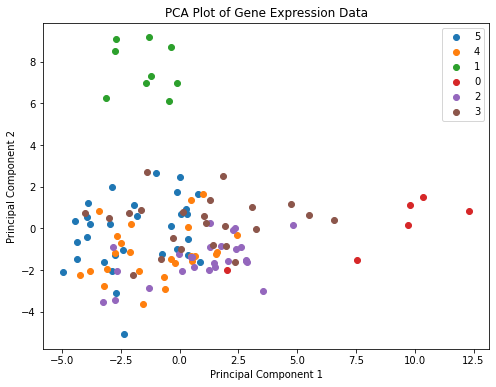

In [17]:
# Visualization (example: PCA plot)
# Note: Visualization depends on the dimensionality reduction technique used
# For simplicity, let's assume PCA here
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
for target in data['type'].unique():
    plt.scatter(X_pca[y_train == target, 0], X_pca[y_train == target, 1], label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Gene Expression Data')
plt.legend()
plt.savefig("pca.png")
plt.show()

In [18]:
plt.savefig("pca.png")

<Figure size 432x288 with 0 Axes>

In [19]:
# Define fitness function
def fitness_function(selected_features):
    # Convert selected_features to 1D array
    selected_features = np.ravel(selected_features)
    
    # Train classifier using selected features
    X_selected = X.iloc[:, selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # Minimize 1-accuracy (i.e., maximize accuracy)

# PySwarms

In [20]:
# # Define PSO parameters
# num_particles = 10
# num_features = X.shape[1]
# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# # Initialize PSO optimizer
# optimizer = ps.single.GlobalBestPSO(n_particles=num_particles, dimensions=num_features, options=options)

# # Perform PSO optimization
# best_position, _ = optimizer.optimize(fitness_function, iters=100)

# # Extract selected features
# selected_features_indices = np.where(best_position == 1)[0]
# selected_features = X.columns[selected_features_indices]

# print("Selected Features:", selected_features)

# Scikit-opt

## PSO

In [ ]:
# Do PSO
from sko.PSO import PSO

# parameters: n_dim, pop, max_iter, w, c1, c2
n_dim = X.shape[1]
pop = 30
max_iter = 10
lb = [0] * n_dim
ub = [1] * n_dim
w = 0.8
c1 = 0.5
c2 = 0.5

# initialize PSO
pso = PSO(func=fitness_function, n_dim=n_dim, pop=pop, max_iter=max_iter, lb=lb, ub=ub, w=w, c1=c1, c2=c2)

# run the PSO
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

# Plot the result
plt.plot(pso.gbest_y_hist)
plt.show()

In [ ]:
# Extract selected features > 0.9
selected_features_indices = np.nonzero(pso.gbest_x > 0.9)[0]
selected_features = X.columns[selected_features_indices]

print("Selected Features:", selected_features)
print("Number of Selected Features:", len(selected_features), "out of", X.shape[1], "features (", np.round(len(selected_features) / X.shape[1] * 100, 2), "%)")

Selected Features: Index(['1294_at', '1316_at', '1494_f_at', '1552256_a_at', '1552258_at',
       '1552286_at', '1552289_a_at', '1552296_at', '1552304_at', '1552306_at',
       ...
       'AFFX-LysX-M_at', 'AFFX-r2-Bs-dap-M_at', 'AFFX-r2-Bs-lys-3_at',
       'AFFX-r2-Bs-phe-3_at', 'AFFX-r2-Bs-thr-3_s_at', 'AFFX-r2-Ec-bioB-5_at',
       'AFFX-r2-Ec-bioB-M_at', 'AFFX-r2-P1-cre-3_at', 'AFFX-r2-P1-cre-5_at',
       'AFFX-ThrX-M_at'],
      dtype='object', length=12013)
Number of Selected Features: 12013 out of 54675 features ( 21.97 %)


In [ ]:
# Train K-Nearest Neighbors classifier using selected features
X_selected = X.iloc[:, selected_features_indices]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy
print("Accuracy of KNN classifier using selected features:", accuracy)

Accuracy of KNN classifier using selected features: 0.7741935483870968


## APSO

In [34]:
# do APSO
import os
from sko.APSO import APSO

n_particles = 10

particles = np.random.uniform(0, 1, (n_particles, X.shape[1]))
velocities = (np.random.random((n_particles, X.shape[1])) - 0.5) / 10

pso_1 = APSO(particles.copy(), velocities.copy(), fitness_function, w=0.8, c_1=1, c_2=1, max_iter=10, auto_coef=True, n_processes=os.cpu_count())
pso_2 = APSO(particles.copy(), velocities.copy(), fitness_function, w=0.9, c_1=4, c_2=0, max_iter=10, auto_coef=True, n_processes=os.cpu_count())
pso_3 = APSO(particles.copy(), velocities.copy(), fitness_function, w=0.9, c_1=0, c_2=4, max_iter=10, auto_coef=True, n_processes=os.cpu_count())

# run pso
while pso_1.next():
    pso_2.next()
    pso_3.next()

  0%|          | 0/10 [00:00<?, ?it/s]

[4/10] $w$:0.544 - $c_1$:2.300 - $c_2$:1.700 - $f$:45.161:  50%|█████     | 5/10 [03:18<03:18, 39.61s/it]


[4/10] $w$:0.544 - $c_1$:2.300 - $c_2$:1.700 - $f$:45.161:  50%|█████     | 5/10 [03:17<03:17, 39.47s/it]
[0/10] $w$:0.800 - $c_1$:3.500 - $c_2$:0.500 - $f$:29.032:  10%|█         | 1/10 [00:51<07:41, 51.30s/it]





[1/10] $w$:0.724 - $c_1$:3.200 - $c_2$:0.800 - $f$:41.935:  20%|██        | 2/10 [00:59<03:28, 26.08s/it]





[2/10] $w$:0.656 - $c_1$:2.900 - $c_2$:1.100 - $f$:45.161:  30%|███       | 3/10 [01:25<03:01, 25.91s/it]





[3/10] $w$:0.596 - $c_1$:2.600 - $c_2$:1.400 - $f$:45.161:  40%|████      | 4/10 [01:51<02:35, 25.91s/it]





[4/10] $w$:0.544 - $c_1$:2.300 - $c_2$:1.700 - $f$:45.161:  50%|█████     | 5/10 [02:16<02:08, 25.69s/it]





[5/10] $w$:0.500 - $c_1$:2.000 - $c_2$:2.000 - $f$:45.161:  60%|██████    | 6/10 [02:41<01:41, 25.44s/it]





[6/10] $w$:0.464 - $c_1$:1.700 - $c_2$:2.300 - $f$:45.161:  70%|███████   | 7/10 [03:07<01:16, 25.49s/it]





[7/10] $w

In [35]:
# print the best results
print('PSO 1 best_x is ', pso_1.g_best, 'best_y is', -pso_1.g_best_value*100)
print('PSO 2 best_x is ', pso_2.g_best, 'best_y is', -pso_2.g_best_value*100)
print('PSO 3 best_x is ', pso_3.g_best, 'best_y is', -pso_3.g_best_value*100)

PSO 1 best_x is  [0.55491907 0.38530356 0.63060838 ... 0.21205957 0.5177969  0.40209301] best_y is 45.16129032258064
PSO 2 best_x is  [ 0.14452048  0.109354    0.21091797 ...  0.18983881 -0.0130478
  0.80659255] best_y is 45.16129032258064
PSO 3 best_x is  [0.00910372 0.90916306 0.48165546 ... 0.18333876 0.19874037 0.57977275] best_y is 45.16129032258064


In [46]:
# Extract selected features > 0.9
selected_features_indices = np.nonzero(pso_3.g_best > 0.9)[0]
print(selected_features_indices)
selected_features = X.columns[selected_features_indices]

print("Selected Features:", selected_features)
print("Number of Selected Features:", len(selected_features), "out of", X.shape[1], "features (", np.round(len(selected_features) / X.shape[1] * 100, 2), "%)")

[    1    15    20 ... 54634 54647 54665]
Selected Features: Index(['1053_at', '1552258_at', '1552269_at', '1552272_a_at', '1552281_at',
       '1552316_a_at', '1552377_s_at', '1552386_at', '1552388_at',
       '1552414_at',
       ...
       '55616_at', '56821_at', '58367_s_at', '64440_at', '65718_at',
       '91816_f_at', 'AFFX-BioB-M_at', 'AFFX-HUMISGF3A/M97935_MA_at',
       'AFFX-PheX-M_at', 'AFFX-r2-Ec-bioD-3_at'],
      dtype='object', length=5170)
Number of Selected Features: 5170 out of 54675 features ( 9.46 %)


In [47]:
# Train K-Nearest Neighbors classifier using selected features
X_selected = X.iloc[:, selected_features_indices]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy
print("Accuracy of KNN classifier using selected features:", accuracy)

Accuracy of KNN classifier using selected features: 0.7741935483870968


## AFSA

In [ ]:
from sko.AFSA import AFSA

# hyperparameters: n_dim, size_pop, max_iter, max_try_num, step, visual, q, delta
n_dim = X.shape[1]
size_pop = 5
max_iter = 10
max_try_num = 10
step = 0.5
visual = 0.3
q = 0.98
delta = 0.5

# init and run AFSA
afsa = AFSA(func=fitness_function, n_dim=n_dim, size_pop=size_pop, max_iter=max_iter, max_try_num=max_try_num, step=step, visual=visual, q=q, delta=delta)
best_x, best_y = afsa.run()
print(best_x, best_y)

In [ ]:
# Extract selected features > 0.9
selected_features_indices = np.nonzero(best_x > 0.9)[0]
selected_features = X.columns[selected_features_indices]

print("Selected Features:", selected_features)
print("Number of Selected Features:", len(selected_features), "out of", X.shape[1], "features (", np.round(len(selected_features) / X.shape[1] * 100, 2), "%)")

Selected Features: Index(['1053_at', '1294_at', '1320_at', '1438_at', '1487_at', '1552257_a_at',
       '1552272_a_at', '1552275_s_at', '1552276_a_at', '1552277_a_at',
       ...
       'AFFX-r2-Bs-lys-5_at', 'AFFX-r2-Bs-phe-5_at', 'AFFX-r2-Bs-phe-M_at',
       'AFFX-r2-Ec-bioB-3_at', 'AFFX-r2-Ec-bioB-M_at', 'AFFX-r2-Ec-bioC-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=27199)


In [ ]:
# Train K-Nearest Neighbors classifier using selected features
X_selected = X.iloc[:, selected_features_indices]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy
print("Accuracy of KNN classifier using selected features:", accuracy)

Accuracy of KNN classifier using selected features: 0.7741935483870968
